# Laboratorio 5 - Reconocimiento Facial

In [1]:
# Instalación de dependencias
!pip install matplotlib scikit-image
!apt-get install -y libsm6 libxext6 libxrender-dev
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libsm6 is already the newest version (2:1.2.3-1build2).
libxext6 is already the newest version (2:1.3.4-1build1).
libxrender-dev is already the newest version (1:0.9.10-1build4).
libxrender-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


**libsm6:** Implementa el X Session Management Protocol. Es requerida por aplicaciones que dependen del sistema de ventanas X11 para la gestión de sesiones gráficas.

**libxext6:** Proporciona extensiones adicionales del sistema X11, necesarias para ciertas operaciones gráficas avanzadas.

**libxrender-dev:** Incluye librerías y archivos de desarrollo para X Render, usados para operaciones de renderizado 2D

In [2]:
#Importar librerías
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw

**cv2 (OpenCV):** Biblioteca especializada en visión por computadora que permite el procesamiento y análisis de imágenes y videos.

**matplotlib.pyplot (plt):** Módulo de visualización de datos que facilita la creación de gráficos y la visualización de imágenes.

**PIL (Image, ImageDraw):** Parte de la biblioteca Pillow, enfocada en la manipulación básica de imágenes. *Image* permite cargar, guardar y transformar imágenes, mientras que *ImageDraw* se utiliza para dibujar sobre ellas.

In [7]:
# Ruta a la imagen
filename= 'keanuReeves.jpg'

# Cargar la imagen usando OpenCV
face = cv2.imread(filename)
face_rgb = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

In [15]:
# Detectar rostro
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

#clasificador Haar Cascade preentrenado.
#Este modelo está diseñado para detectar rostros frontales.
faces = face_cascade.detectMultiScale(face, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

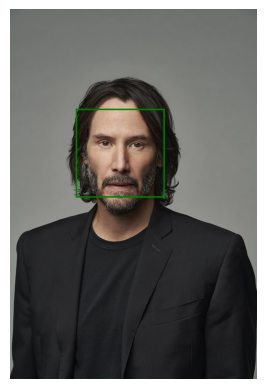

In [17]:
# Mostrar la imagen con los rostros detectados
img_pil = Image.fromarray(face_rgb)
draw = ImageDraw.Draw(img_pil)

for (x,y, w, h) in faces:
  draw.rectangle([(x,y), (x+w, y+h)], outline='green', width=6)

plt.imshow(img_pil)
plt.axis('off')
plt.show()

## Buscar coincidencias dentro de una colección

In [18]:
!pip install opencv-contrib-python

Es una distribución de OpenCV que incluye:
* Algoritmos de visión por computadora avanzada.
* Funcionalidades como:
* Detección y seguimiento de objetos (tracking).
* Algoritmos de reconocimiento facial.
* Métodos avanzados de extracción de características (SIFT, SURF, entre otros).
* Procesamiento y análisis más especializado.

In [19]:
import numpy as np

In [20]:
#Simular la colección
collection = []

face_count = 0
threshold = 70

# Función para detectar rostros en una imagen
def deteccion_rostros(path):
  image = cv2.imread(path)
  image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  faces = face_cascade.detectMultiScale(face, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
  return faces, image

collection_paths = ['keanuReeves.jpg', 'eminem.JPG']
for imagen in collection_paths:
  faces, _ = deteccion_rostros(imagen)
  if len(faces) > 0:
    collection.append(
        {
            'image_path': imagen,
            'faces': faces
        }
    )
    face_count += len(faces)

print(face_count)


2


In [21]:
# Buscar coincidencias en la colección con una imagen objetivo
target_image_path = "keanuReeves2.jpg"
target_faces, target_image = deteccion_rostros(target_image_path)
img_rgb = cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB)

print("Buscando coincidencias en la colección...")
matches = []
for indexed_image in collection:
    for target_face in target_faces:
        for indexed_face in indexed_image["faces"]:
            # Comparación simple basada en tamaño de las cajas delimitadoras
            sim_width = min(target_face[2], indexed_face[2]) / max(target_face[2], indexed_face[2])
            sim_height = min(target_face[3], indexed_face[3]) / max(target_face[3], indexed_face[3])
            similarity = (sim_width + sim_height) / 2 * 100
            if similarity >= threshold:
                matches.append({
                    "target_face": target_face,
                    "indexed_image_path": indexed_image["image_path"],
                    "similarity": similarity
                })

# Mostrar coincidencias
print("Coincidencias encontradas:")
for match in matches:
    print(f"Imagen coincidente: {match['indexed_image_path']}")
    print(f"Similaridad: {match['similarity']:.2f}%")

Buscando coincidencias en la colección...
Coincidencias encontradas:
Imagen coincidente: keanuReeves.jpg
Similaridad: 100.00%
Imagen coincidente: eminem.JPG
Similaridad: 100.00%


In [ ]:

# Cargar la imagen usando OpenCV


# Mostrar la imagen con los rostros detectados


# Mostrar la imagen objetivo con las cajas



In [22]:
# Simular eliminación de la colección
collection.clear()